import package

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import random

讀取資料

In [2]:
ds = pd.read_csv('./effline.csv')
ds_v = pd.read_csv('./effline_val.csv')

拆分數據(輸入數據與label)

In [3]:
ds = np.array(ds)
targets = ds[:, 0]
data = ds[:, 1:]
ds_v = np.array(ds_v)
v_targets = ds_v[:, 0]
v_data = ds_v[:, 1:]
data = np.asarray(data).astype(np.float32)

建立模型

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=1000,
        output_dim=64,
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

訓練模型

In [5]:
model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 5
history = model.fit(data, targets, epochs=num_epochs, validation_data=(v_data, v_targets), verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 138,499
Trainable params: 138,499
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5


2022-08-05 22:58:11.903302: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


10/10 - 3s - loss: 1.0717 - accuracy: 0.6033 - val_loss: 1.0052 - val_accuracy: 0.6944 - 3s/epoch - 280ms/step
Epoch 2/5
10/10 - 0s - loss: 0.9044 - accuracy: 0.6667 - val_loss: 0.7001 - val_accuracy: 0.6944 - 108ms/epoch - 11ms/step
Epoch 3/5
10/10 - 0s - loss: 0.5718 - accuracy: 0.6533 - val_loss: 0.5167 - val_accuracy: 0.6111 - 110ms/epoch - 11ms/step
Epoch 4/5
10/10 - 0s - loss: 0.4765 - accuracy: 0.6667 - val_loss: 0.4815 - val_accuracy: 0.6944 - 110ms/epoch - 11ms/step
Epoch 5/5
10/10 - 0s - loss: 0.4740 - accuracy: 0.6533 - val_loss: 0.4867 - val_accuracy: 0.6111 - 110ms/epoch - 11ms/step


查看訓練結果

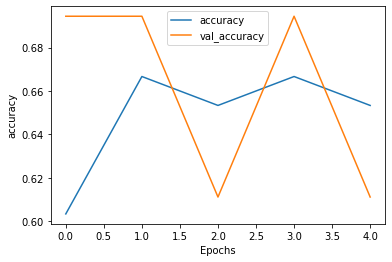

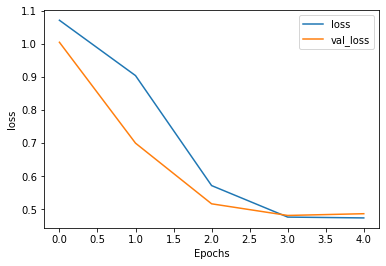

In [6]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

模組測試

In [7]:
testdata = pd.read_csv('./effline_test.csv', engine='python')
print(testdata)
pred = model.predict(testdata)
labels = ['sinh', 'cos', 'sin']
print(pred, labels[np.argmax(pred)])

      data1     data2     data3     data4     data5     data6    data7  \
0  0.132417  0.249354  0.463133  0.712457  1.044318  1.333741  1.71705   

      data8     data9    data10  ...     data20     data21     data22  \
0  1.908816  2.743964  3.546127  ...  26.130571  30.137809  35.869198   

      data23     data24     data25     data26      data27     data28  \
0  44.405439  50.509825  73.751986  81.843372  100.579042  126.12096   

       data29  
0  148.849883  

[1 rows x 29 columns]
[[9.9999309e-01 1.3769652e-06 5.4489487e-06]] sinh
